In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

from sklearn.neighbors import KernelDensity

from scipy import stats

Using TensorFlow backend.


In [146]:
rawdata = pd.read_csv("최종리스트.csv",engine="python",encoding = "cp949",skiprows=0)

In [147]:
rawdata[rawdata["text"].duplicated() == False].to_csv("최종리스트_utf-8.csv",encoding="cp949",index=False)

In [148]:
#원본 데이터셋의 리뷰 수

len(rawdata["text"])

29326

In [149]:
# 중복된 자료들을 보여준다.

rawdata["text"][rawdata["text"].duplicated()].head(20)

33    오랜만에  알텐데  기네스 는 오늘따라 맛이 너무 별루였구 지난 번 맛있게 먹었던 ...
34    오랜만에  알텐데  기네스 는 오늘따라 맛이 너무 별루였구 지난 번 맛있게 먹었던 ...
36    오랜만에  알텐데  기네스 는 오늘따라 맛이 너무 별루였구 지난 번 맛있게 먹었던 ...
47     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
48     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
49     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
50     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
51     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
52     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
53     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
54     치킨은 살안쪄요 해피 일상 소통 치맥 생맥주 beer fff 존맛탱 갑중갑 여가 ...
57     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
58     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
59     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
60     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
61     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
62     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타 먹방 ...
63     맛집스타그램 압구정역맛집 치느님 치킨매니아 양념치킨 양념반후라이드반 먹스타

In [150]:
#중복값 제거 후의 리뷰 수

len(pd.unique(rawdata["text"]))

26904

In [153]:
text = pd.unique(rawdata["text"])

text = DataFrame(text,columns=["text"])["text"].dropna()

In [155]:
#문장을 토큰화하여 리스트에 담는다.

morph = list()

for i in text:
    raw = twitter_tag.morphs(i)
    #한 글자 짜리 단어를 처리하고 싶다면 두번째 줄을 켜고, 끄고 싶다면 이 코드를 주석처리 한다.
    raw = [raw[k] for k in np.where([len(j) != 1 for j in raw])[0]]
    morph.append(raw)

In [156]:
len(morph)

26903

In [157]:
#문장의 적정 길이 탐색
## 우선 문장 데이터에서 적절한 문장 길이 투입수와 윈도우 수를 확인한다.

length = DataFrame()

for i,j in enumerate(morph):
    good = DataFrame([len(j)],index=[i])
    length = pd.concat([length,good],axis=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7C77A048>]],
      dtype=object)

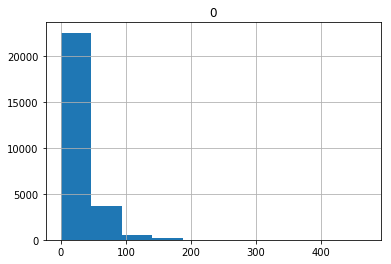

In [158]:
#오리지널
length.hist()

In [159]:
#첫 번째 트라이얼
#해당 길이에서 자르면서 버려지는 문장의 수
len(length[length[0]>200])

37

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7C811710>]],
      dtype=object)

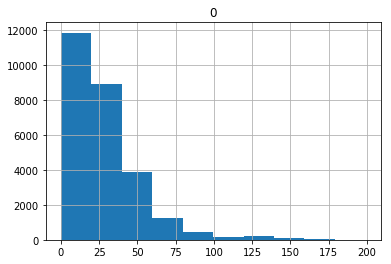

In [160]:
# 200개 이하 문장만 봤을때의 히스토그램

length_cut = length[length[0]<200]

length_cut.hist()

In [161]:
#두 번째 트라이얼
len(length[length[0]>100])

609

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7C881278>]],
      dtype=object)

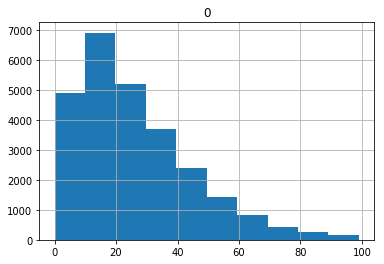

In [162]:
length_cut2 = length[length[0]<100]

length_cut2.hist()

In [163]:
#세 번째 트라이얼

len(length[length[0]>60])

2201

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7C8F19B0>]],
      dtype=object)

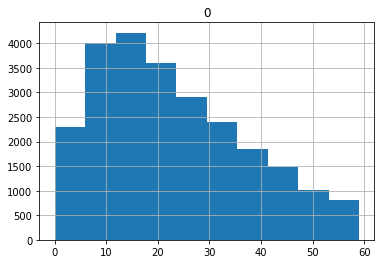

In [164]:
length_cut3 = length[length[0]<60]

length_cut3.hist()

In [165]:
#네 번째 트라이얼

len(length[length[0]>40])

5860

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7C9840B8>]],
      dtype=object)

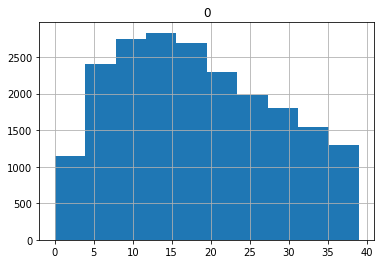

In [166]:
length_cut4 = length[length[0]<40]

length_cut4.hist()

In [267]:
#분포간의 차이를 보여주는 kstest를 실시한다.(문장 길이의 분포와, 정규분포 "norm"의 차이를 계산해준다.)
#pvalue가 0.05 이하면 서로 다른 분포이고, pvalue가 0.05 이상이면 서로 같은 분포다.

kstest("norm","norm")

KstestResult(statistic=0.20976323523288398, pvalue=0.2995610944359206)

In [168]:
#최종적으로, 해당 문장 길이만 살렸을때의 남는 문장의 수

len(text[length_cut4.index])

C:\Users\User\Anaconda3\envs\tensorflow36\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


20745

In [197]:
text = text[length_cut4.index].dropna()

C:\Users\User\Anaconda3\envs\tensorflow36\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [201]:
morph = Series(morph)[length_cut4.index].tolist()

In [246]:
twitter_tag.morphs(text[0])

['살아남기',
 '방송',
 '안무',
 '너구리',
 '신나는',
 '짜장라면',
 '간식',
 '거리',
 '두통약',
 '자취',
 '생활',
 '거울',
 '칼로리',
 '길거리',
 '기네스',
 '요거트']

In [253]:
for i in text[0:3]:
    raw = twitter_tag.morphs(i)
    #한 글자 짜리 단어를 처리하고 싶다면 두번째 줄을 켜고, 끄고 싶다면 이 코드를 주석처리 한다.
    print([raw[k] for k in np.where([len(j) != 1 for j in raw])[0]])

['살아남기', '방송', '안무', '너구리', '신나는', '짜장라면', '간식', '거리', '두통약', '자취', '생활', '거울', '칼로리', '길거리', '기네스', '요거트']
['팔로우', '좋아요', '길거리', '자취녀', '기네스', '아유', '장거리', '공연', '일리', '만취', '취미', '선팔', '좋아요', '미니', '건강검진', '인스타', '베이비', '선팔', '로우', '리뷰', '일상', '머리', '일요일', '레시피', '인친', '좋아요', '드디어', '인친', '먹어']
['저녁밥', '칼로리', '산책', '느끼', '자취녀', '기네스', '예술가', '방송', '공연', '일리', '만취', '여유', '방탄', '콘서트', '선팔', '좋아요', '미니', '건강한', '다이어트', '스타', '선팔', '로우', '리뷰', '일상', '소통', '그램', '중간', '일요일', '레시피', '시작', '좋아', '나도']


In [254]:
for i in text[0:3]:
    print(twitter_tag.morphs(i))

['살아남기', '방송', '안무', '너구리', '신나는', '짜장라면', '간식', '거리', '두통약', '자취', '생활', '거울', '칼로리', '길거리', '기네스', '요거트']
['팔로우', '좋아요', '길거리', '자취녀', '기네스', '좋', '아유', '장거리', '갑', '분', '싸', '공연', '데', '일리', '룩', '만취', '새', '옷', '취미', '선팔', '좋아요', '미니', '건강검진', '인스타', '베이비', '선팔', '로우', '리뷰', '백', '일상', '머리', '일요일', '은', '레시피', '인친', '좋아요', '드디어', '인친', '쌈', '싸', '먹어']
['저녁밥', '상', '칼로리', '산책', '냥', '느끼', '자취녀', '기네스', '예술가', '방송', '갑', '분', '싸', '공연', '데', '일리', '룩', '만취', '여유', '방탄', '콘서트', '선팔', '좋아요', '미니', '건강한', '다이어트', '셀', '스타', '선팔', '로우', '리뷰', '일상', '소통', '그램', '중간', '일요일', '은', '레시피', '시작', '이', '좋아', '나도']


In [258]:
from konlpy.tag import Okt
twitter_tag = Okt()

def vect_tokenizer(text):
    raw = twitter_tag.morphs(text)
    #한 글자 짜리 단어를 처리하고 싶다면 두번째 줄을 켜고, 끄고 싶다면 이 코드를 주석처리 한다.
    return [raw[k] for k in np.where([len(j) != 1 for j in raw])[0]]

vect = CountVectorizer(tokenizer = vect_tokenizer ,min_df = 0, analyzer = "word")

vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function vect_tokenizer at 0x0000021E7C65E620>,
        vocabulary=None)

In [259]:
len(vect.vocabulary_)

57051

In [257]:
vect.vocabulary_

{'저녁밥': 25,
 '칼로리': 29,
 '산책': 14,
 '느끼': 5,
 '자취녀': 24,
 '기네스': 3,
 '예술가': 20,
 '방송': 12,
 '공연': 1,
 '일리': 21,
 '만취': 10,
 '여유': 19,
 '방탄': 13,
 '콘서트': 30,
 '선팔': 15,
 '좋아요': 27,
 '미니': 11,
 '건강한': 0,
 '다이어트': 6,
 '스타': 17,
 '로우': 8,
 '리뷰': 9,
 '일상': 22,
 '소통': 16,
 '그램': 2,
 '중간': 28,
 '일요일': 23,
 '레시피': 7,
 '시작': 18,
 '좋아': 26,
 '나도': 4}

In [225]:
'''
vectorized = list()

for k in morph:
    raw = list()
    for i in k:
        try:
            raw.append(vect.vocabulary_[i])
        except:
            pass
    vectorized.append(raw)
'''

In [202]:
a = 0
b = 0

for i in range(0,len(morph)):
    a += len(morph[i])

mu = a/len(morph)

for i in range(0, len(morph)):
    b += ((len(morph[i]) - mu)**2)
    #print(b)

std_dev = (b/len(morph))**0.5

print(mu,std_dev)

size= mu + (std_dev*3)

18.328994938539406 10.231180772154472


In [227]:
vectorized[0]

[2823, 3858, 594, 703, 5090, 3421, 706, 5880, 1143, 1094, 4593]

In [231]:
#size와 window 크기를 걸졍. size는 평균(mu) 에서 3 표준편차만큼(std_dev*3) 더한 값을 써준다.

from gensim.models import Word2Vec
embedding_model = Word2Vec(morph, size=int(size), window = int(size), workers = -1, iter=1000, sg=1)

In [142]:
embedding_model.save("테스트.h5")

In [242]:
len(pd.unique(Series(embedding_model.wv.index2word)))

8301

In [173]:
#positive는 선형결합을 해줄 단어 벡터들을 의미한다. negative는 반대로 빼줄 단어 벡터를 의미한다.
embedding_model.wv.most_similar(positive=["여행"])

C:\Users\User\Anaconda3\envs\tensorflow36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('이끌려', 0.43977755308151245),
 ('진짜루', 0.3749675750732422),
 ('녹는', 0.3677544891834259),
 ('아파서', 0.36752983927726746),
 ('들춰', 0.3643838167190552),
 ('드러나는', 0.35355716943740845),
 ('장난감', 0.35188549757003784),
 ('하려고하는데', 0.3475516438484192),
 ('되다', 0.3475395441055298),
 ('언젠가', 0.34553205966949463)]

In [89]:
#임베딩한 모델을 저장한다.
embedding_model.save("유랑.model")

In [90]:
#저장했던 모델을 다시 불러온다.
embedding_model2 = Word2Vec.load("유랑.model")

In [ ]:
vocab = list(embedding_model.wv.vocab)
X = embedding_model[vocab]

In [ ]:
## 시간이 매우매우매우 오래 걸린다. 주의!!!

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)

X_tsne = tsne.fit_transform(X)

In [ ]:
#모든 벡터들을 다 2차원 공간에 뿌리는 데이터프레임

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

df.shape

In [420]:
#100개의 단어 벡터들만 뽑아서 뿌리는 데이터 프레임

df2 = pd.DataFrame(X_tsne[:100], index=vocab[:100], columns=['x', 'y'])

df2.shape

X_tsne_100 = np.array(X_tsne[13764])

for i in vocab_index:
    X_tsne_100 = np.vstack([X_tsne_100,X_tsne[i]])

(100, 2)

In [572]:
X_tsne_100 = np.array(X_tsne[13764])

for i in vocab_index:
    X_tsne_100 = np.vstack([X_tsne_100,X_tsne[i]])

In [573]:
df3 = pd.DataFrame(X_tsne_100, index=vocabs, columns=['x', 'y'])
df3.shape

(11, 2)

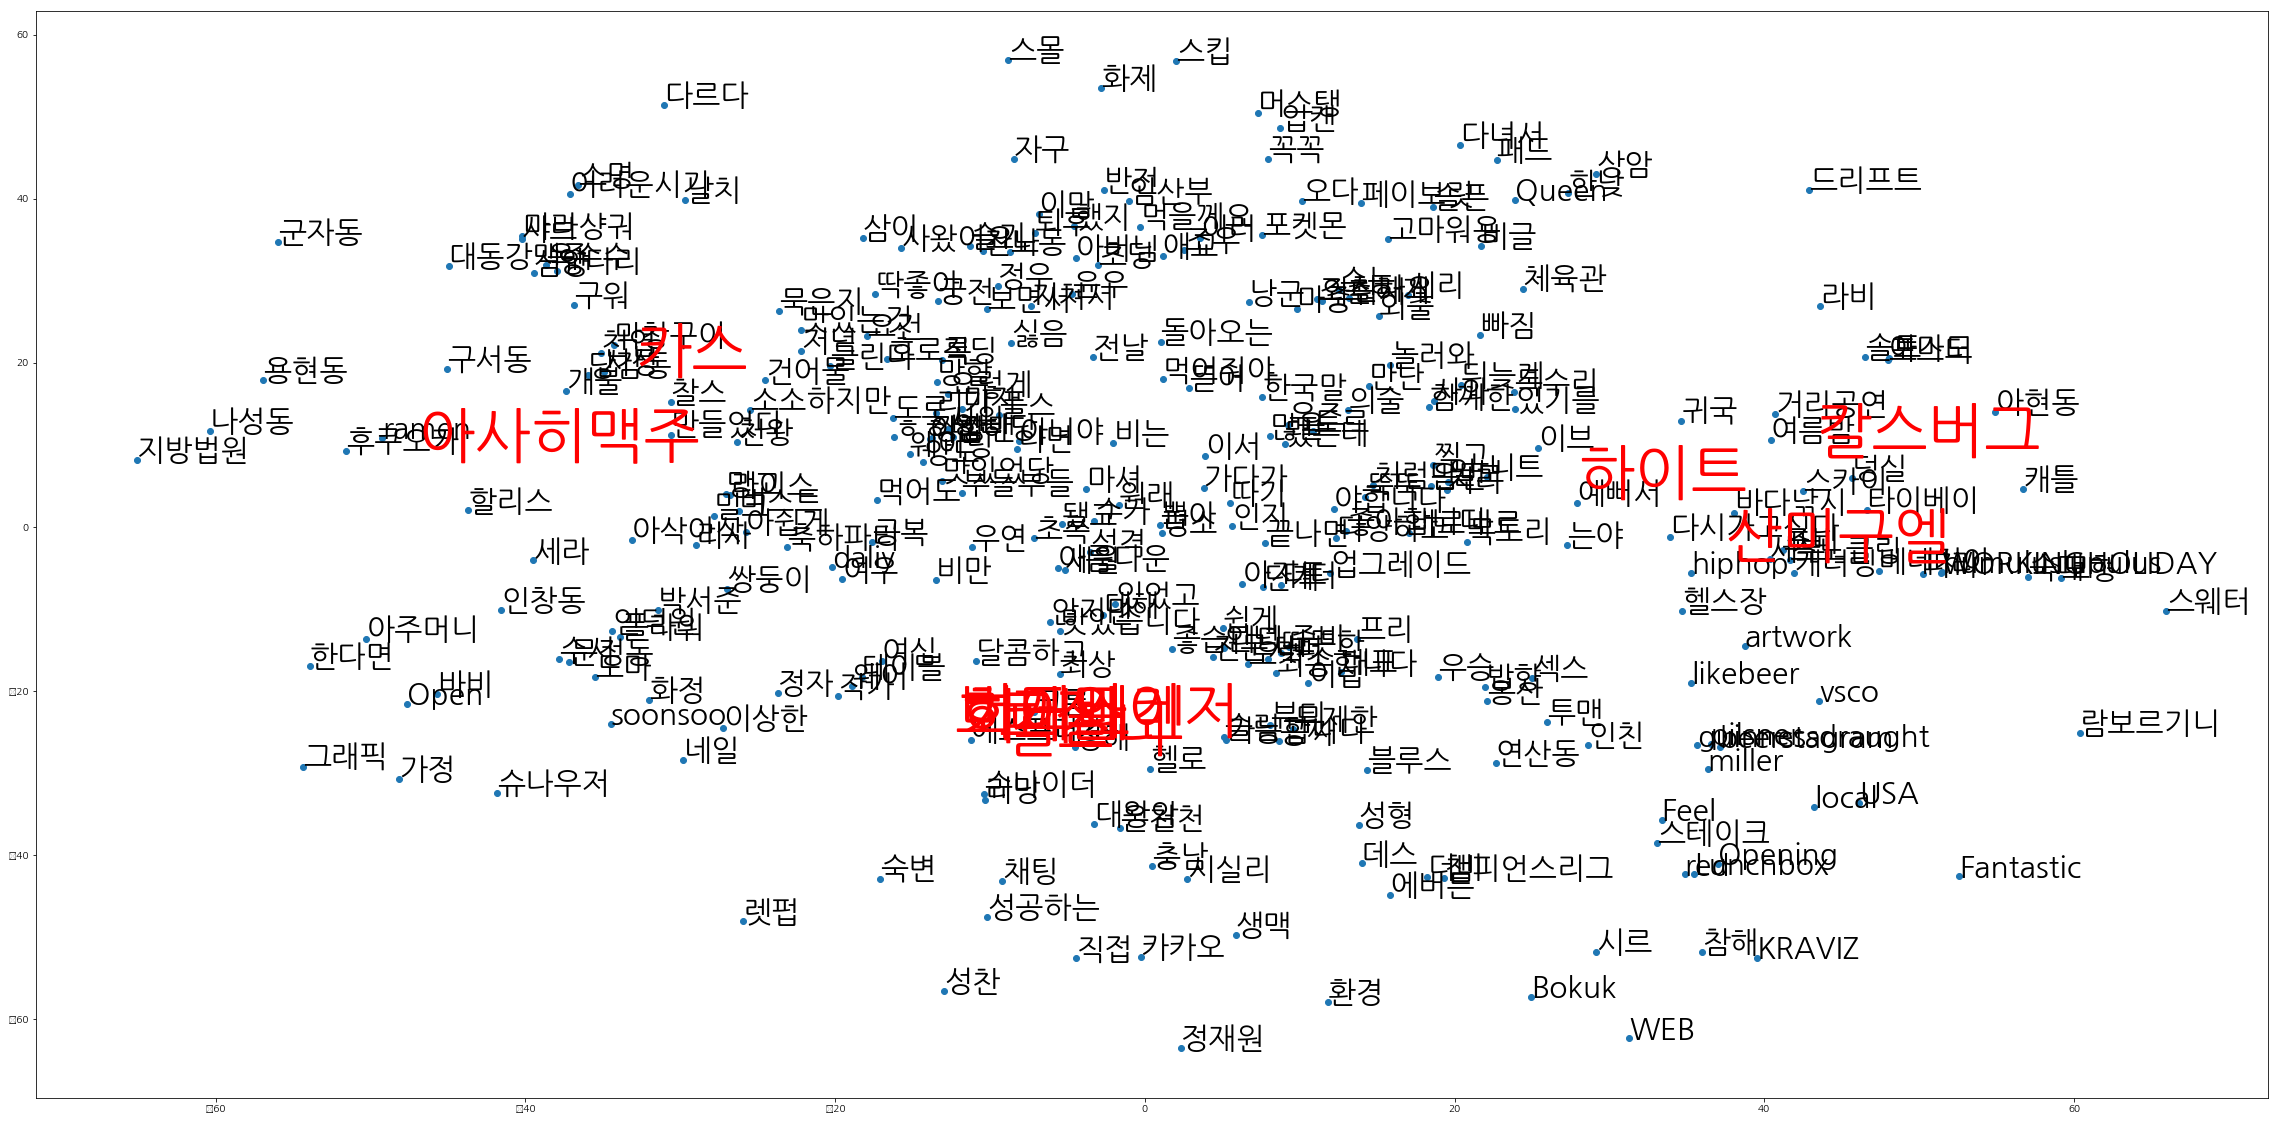

In [578]:
path = 'C:\Windows\\Fonts\\nanum.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'], df2['y'])

for word, pos in df2.iterrows():
    ax.annotate(word, pos, fontsize=30)

for word, pos in df3.iterrows():
    ax.annotate(word,pos,fontsize=60,color="red")
plt.show()